In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [37]:
%run TestProductionChange.ipynb

test_prepData (__main__.TestDataPrep) ... ok
test_withNA (__main__.TestDataPrep) ... ok
test_getItemsThatHaveElement (__main__.TestGetItemWithElements) ... ok
test_itemToProductionElementDictionary (__main__.TestItemToProdElement) ... ok
test_productionChange (__main__.TestItemToProdElement) ... ok
test_yieldPrepData (__main__.TestYieldDataPrep) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.171s

OK
test_prepData (__main__.TestDataPrep) ... ok
test_withNA (__main__.TestDataPrep) ... ok
test_getItemsThatHaveElement (__main__.TestGetItemWithElements) ... ok
test_itemToProductionElementDictionary (__main__.TestItemToProdElement) ... ok
test_productionChange (__main__.TestItemToProdElement) ... ok
test_yieldPrepData (__main__.TestYieldDataPrep) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.169s

OK


In [38]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")

What are all the different types of elements? 

In [39]:
agData['Element'].unique()

array(['Area harvested', 'Yield', 'Production', 'Stocks', 'Laying',
       'Producing Animals/Slaughtered', 'Yield/Carcass Weight',
       'Milk Animals', 'Prod Popultn'], dtype=object)

The production elements are production, stocks, laying, and prod popultn. Look up each in https://www.fao.org/faostat/en/#definitions.

Create a dictionary like {'apples': 'yield', 'beehives': 'stocks', etc.}

In [40]:
agData = agData.drop(agData[agData['Area'] == "China"].index)
prodChangeDF = productionChangeDF(agData, 1961, 2020)
prodChangeDF.head()

,Item,Element,Unit,1961,2020,Change
0,Agave fibres nes,Production,tonnes,34600.0,41114.0,0.19
1,"Almonds, with shell",Production,tonnes,756588.0,4140043.0,4.47
2,"Anise, badian, fennel, coriander",Production,tonnes,82455.0,2224101.0,25.97
3,Apples,Production,tonnes,17053651.0,86442716.0,4.07
4,Apricots,Production,tonnes,1317607.0,3719974.0,1.82


In [41]:
agData.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN,22134.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc,17759.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN,39307.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,24500.0,Im,26500.0,Im,25333.0,Im,25444.0,Im,25759.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7075.0,Fc,7149.0,Fc,7142.0,Fc,7123.0,Fc,7138.0,Fc


In [42]:
prodChangeDF.sort_values(by='Change')

,Item,Element,Unit,1961,2020,Change
299,Yoghurt,Production,tonnes,883.0,1.0,-1.0
170,"Milk, whole evaporated",Production,tonnes,2902814.0,1.0,-1.0
52,"Cheese, whole cow milk",Production,tonnes,3603062.0,1.0,-1.0
51,"Cheese, skimmed cow milk",Production,tonnes,1049930.0,1.0,-1.0
50,"Cheese, sheep milk",Production,tonnes,388888.0,1.0,-1.0
...,...,...,...,...,...,...
124,Kiwi fruit,Production,tonnes,1.0,4407407.0,4407406.0
189,"Offals, pigs, edible",Production,tonnes,1.0,5424519.0,5424518.0
86,"Fat, pigs",Production,tonnes,1.0,8481622.0,8481621.0
186,"Offals, edible, cattle",Production,tonnes,1.0,8513288.0,8513287.0


Some years might have all NANs. Is it only 2020 where that's the case?

In [43]:
itemToAllNANCols = getYearsAllNANForItems(agData)
print(itemToAllNANCols)    

{'Butter and ghee, sheep milk': ['Y2020'], 'Butter, cow milk': ['Y2020'], 'Cheese, goat milk': ['Y2020'], 'Cheese, sheep milk': ['Y2020'], 'Cotton lint': ['Y2020'], 'Cottonseed': ['Y2020'], 'Fat, camels': ['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990'], 'Fat, cattle': ['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990'], 'Fat, goats': ['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y198

In [46]:
agData[(agData['Item'] == "Butter, goat milk")]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
49387,203,Spain,1022,"Butter, goat milk",5510,Production,tonnes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59624,5000,World,1022,"Butter, goat milk",5510,Production,tonnes,NaN,NaN,NaN,...,NaN,A,NaN,A,NaN,A,NaN,NaN,NaN,NaN
69501,5400,Europe,1022,"Butter, goat milk",5510,Production,tonnes,NaN,NaN,NaN,...,NaN,A,NaN,A,NaN,A,NaN,NaN,NaN,NaN
71102,5403,Southern Europe,1022,"Butter, goat milk",5510,Production,tonnes,NaN,NaN,NaN,...,NaN,A,NaN,A,NaN,A,NaN,NaN,NaN,NaN
73850,5707,European Union (27),1022,"Butter, goat milk",5510,Production,tonnes,NaN,NaN,NaN,...,NaN,A,NaN,A,NaN,A,NaN,NaN,NaN,NaN


Which year appears the most frequently in the dictionary? 

In [53]:
counter = {}
for key, val in itemToAllNANCols.items():
    for year in val:
        year = int(year[1:])
        counter[year] = counter.get(year, 0) + 1
print(counter)

{2020: 56, 1961: 20, 1962: 20, 1963: 20, 1964: 20, 1965: 20, 1966: 20, 1967: 20, 1968: 20, 1969: 20, 1970: 19, 1971: 19, 1972: 19, 1973: 19, 1974: 19, 1975: 18, 1976: 18, 1977: 18, 1978: 18, 1979: 18, 1980: 18, 1981: 18, 1982: 17, 1983: 17, 1984: 17, 1985: 17, 1986: 17, 1987: 16, 1988: 16, 1989: 16, 1990: 15, 1991: 4, 1992: 4, 1993: 4, 1994: 4, 1995: 4, 1996: 4, 1997: 4, 1998: 4, 1999: 4, 2000: 3, 2001: 3, 2002: 3, 2003: 3, 2004: 3, 2005: 3, 2006: 3, 2007: 3, 2008: 3, 2009: 3, 2010: 3, 2011: 3, 2012: 4, 2013: 4, 2014: 4, 2015: 4, 2016: 4, 2017: 4, 2018: 4, 2019: 4}


<BarContainer object of 60 artists>

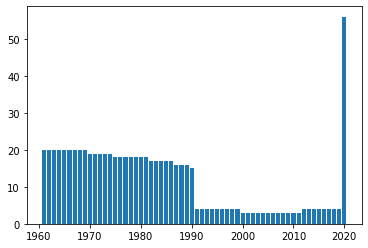

In [54]:
fig, ax = plt.subplots()
ax.bar(counter.keys(), counter.values())

Early years have less data, which would make sense. 2020 seems to be an outlier year in terms of collecting data. 